# Multiple Linear Regression  
GUNGUN JAIN T085

Using Indian KIDS SCREEN TIME


# Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

sns.set_theme()


# Import data

In [ ]:
# Load Indian Kids Screen Time dataset
df = pd.read_csv('/content/Indian_Kids_Screen_Time.csv')
print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (9712, 8)


,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


# Analyze data

## Describe

In [ ]:
# Describe numerical columns
df[['Age', 'Avg_Daily_Screen_Time_hr']].describe()


,Age,Avg_Daily_Screen_Time_hr
count,9712.000000,9712.000000
mean,12.979201,4.352837
std,3.162437,1.718232
min,8.000000,0.000000
25%,10.000000,3.410000
50%,13.000000,4.440000
75%,16.000000,5.380000
max,18.000000,13.890000


## Distribution of target variable (cook_time)

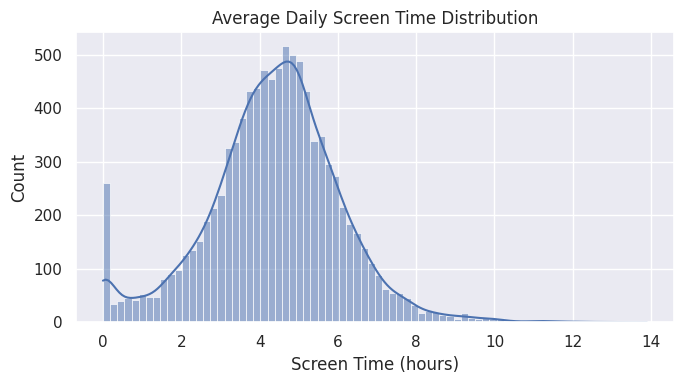

In [ ]:
plt.figure(figsize=(7,4))
sns.histplot(df['Avg_Daily_Screen_Time_hr'], kde=True)
plt.title('Average Daily Screen Time Distribution')
plt.xlabel('Screen Time (hours)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


## Relationship between cook_time and prep_time

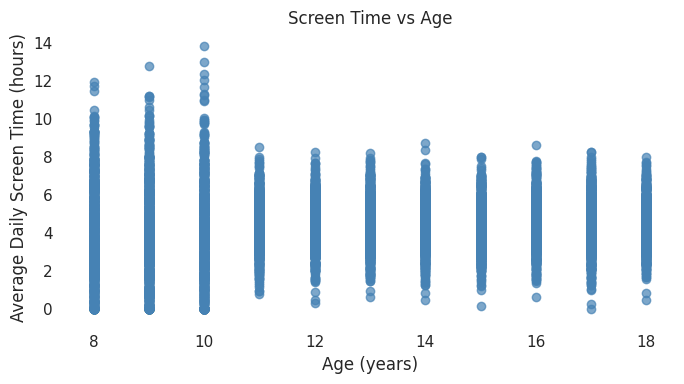

In [ ]:
plt.figure(figsize=(7,4))
plt.scatter(df['Age'], df['Avg_Daily_Screen_Time_hr'], color='steelblue', alpha=0.7)
plt.title('Screen Time vs Age')
plt.xlabel('Age (years)')
plt.ylabel('Average Daily Screen Time (hours)')
plt.box(False)
plt.tight_layout()
plt.show()


## Average cook_time by region

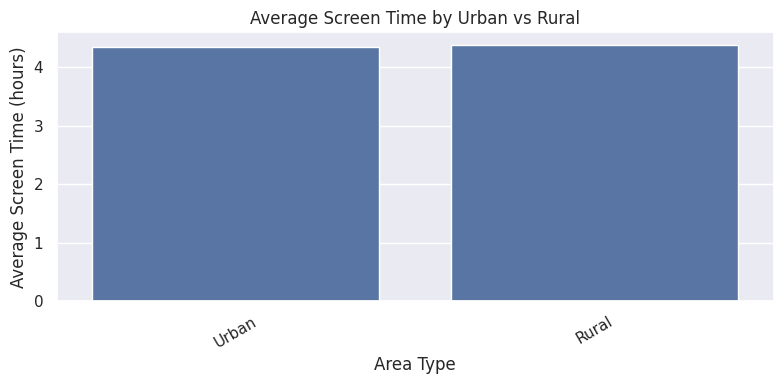

In [ ]:
plt.figure(figsize=(8,4))
region_means = df.groupby('Urban_or_Rural')['Avg_Daily_Screen_Time_hr'].mean().sort_values()
sns.barplot(x=region_means.index, y=region_means.values)
plt.title('Average Screen Time by Urban vs Rural')
plt.xlabel('Area Type')
plt.ylabel('Average Screen Time (hours)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


# Split dataset into dependent and independent variables

In [ ]:
# We want to predict 'Avg_Daily_Screen_Time_hr' (dependent variable)
# Using:
# - Age (numeric)
# - Gender (categorical)
# - Primary_Device (categorical)
# - Urban_or_Rural (categorical)

df_model = df[['Age', 'Gender', 'Primary_Device', 'Urban_or_Rural', 'Avg_Daily_Screen_Time_hr']].dropna()

X = df_model[['Age', 'Gender', 'Primary_Device', 'Urban_or_Rural']]
y = df_model['Avg_Daily_Screen_Time_hr']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

X.head()


Shape of X: (9712, 4)
Shape of y: (9712,)


,Age,Gender,Primary_Device,Urban_or_Rural
0,14,Male,Smartphone,Urban
1,11,Female,Laptop,Urban
2,18,Female,TV,Urban
3,15,Female,Laptop,Urban
4,12,Female,Smartphone,Urban


# One-hot encoding of categorical data

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Correct column lists for your dataset
categorical_cols = ['Gender', 'Primary_Device', 'Urban_or_Rural']
numeric_cols = ['Age']

# Create ColumnTransformer for one-hot encoding
ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'   # keeps numeric columns (Age)
)

# Fit-transform X
X_encoded = ct.fit_transform(X)

print("Shape after encoding:", X_encoded.shape)


Shape after encoding: (9712, 6)


# Split dataset into train and test sets

In [ ]:
# Train-test split (works with your dataset)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=0
)

print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])


Training set size: 7769
Test set size: 1943


# Train multiple regression model

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Model training completed.")

Model training completed.


# Predict results

In [ ]:
y_pred = regressor.predict(X_test)

print("First 5 predictions:", y_pred[:5])
print("First 5 actual values:", np.array(y_test)[:5])

First 5 predictions: [4.36748375 4.67378124 4.4181818  4.36821753 4.29181615]
First 5 actual values: [4.88 4.17 3.05 3.68 1.94]


# Evaluate model performance

In [ ]:
# Calculate metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

# Print results
print("R² score:", r2)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)


R² score: 0.010779138344897965
MSE: 2.9339995781838506
RMSE: 1.7128921677046254
MAE: 1.2929313062317722


# Compare predictions with actual values

In [ ]:
# Combine actual and predicted values side by side
comparison = pd.DataFrame({
    'Actual_Screen_Time': y_test.values,
    'Predicted_Screen_Time': y_pred
}).reset_index(drop=True)

comparison.head(10)


,Actual_Screen_Time,Predicted_Screen_Time
0,4.88,4.367484
1,4.17,4.673781
2,3.05,4.418182
3,3.68,4.368218
4,1.94,4.291816
5,4.66,4.481365
6,5.39,4.623817
7,6.24,4.239317
8,5.11,4.623817
9,2.31,4.112785


Interpretation

In this notebook, we used Multiple Linear Regression on the Indian Kids Screen Time dataset to predict:
 Avg_Daily_Screen_Time_hr (dependent variable)

using the following features:

Age (numeric)

Gender (categorical, one-hot encoded)

Primary_Device (categorical, one-hot encoded)

Urban_or_Rural (categorical, one-hot encoded)

The model's performance is summarised using R², MSE, RMSE and MAE.

You can interpret:

R² as the proportion of variance in daily screen time explained by the selected features.

Error metrics (MSE, RMSE, MAE) as different measures of average prediction error in hours.

You can experiment further by adding or removing features (for example, including
Exceeded_Recommended_Limit, Educational_to_Recreational_Ratio, or Health_Impacts)
and compare how the model performance changes.